<a href="https://colab.research.google.com/github/HuaiyuZhang/DeepLearning/blob/main/OpenMMLab-Camp%20/Assignment_2_MMPretrain_Fruit/MMPretrain_Fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMPretrain on Fruit Classification

In [1]:
!git clone https://github.com/open-mmlab/mmpretrain.git
%cd mmpretrain
!pip install -U openmim && mim install -e .
# Multimodal support
!mim install -e ".[multimodal]"

Cloning into 'mmpretrain'...
remote: Enumerating objects: 16733, done.
remote: Counting objects: 100% (1564/1564), done.
remote: Compressing objects: 100% (675/675), done.
remote: Total 16733 (delta 986), reused 1313 (delta 870), pack-reused 15169
Receiving objects: 100% (16733/16733), 13.27 MiB | 24.14 MiB/s, done.
Resolving deltas: 100% (11607/11607), done.
/content/mmpretrain
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 1.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
Obtaining file:///content/mmpretrain
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━

In [1]:
import mmpretrain
print(mmpretrain.__version__)

1.0.0rc8


# Fruit classifier

N_class=30

In [16]:
!pwd

/content/mmpretrain


In [21]:
%cd ..

/content


In [22]:
!pwd
!ls

/content
drive  mmpretrain  sample_data


In [23]:
!mkdir fruit
!mkdir fruit/data

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [24]:
!cp /content/drive/MyDrive/temp/fruit30_train.tar fruit

In [25]:
!tar -xf ./fruit/fruit30_train.tar -C ./fruit/data

In [26]:
import os
fruit_classes = os.listdir('./fruit/data')

In [27]:
fruit_classes[:5]

['山竹', '脐橙', '葡萄-白', '苹果-青', '桂圆']

In [28]:
import os
import shutil
import random

# Your original folders
folders = fruit_classes

base_dir = './fruit/data/'  # The directory containing the folders a1, a2, ..., a10

# The directories where you'll store your train, validation, and test data
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create train, val, test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for folder in folders:
    current_dir = os.path.join(base_dir, folder)

    # Get all the files in the folder
    files = os.listdir(current_dir)

    # Shuffle the files
    random.shuffle(files)

    # Get the split indices
    train_idx = int(len(files) * 0.6)
    val_idx = int(len(files) * 0.8)

    # Split the files
    train_files = files[:train_idx]
    val_files = files[train_idx:val_idx]
    test_files = files[val_idx:]

    # Function to copy files
    def copy_files(files, dest_folder):
        dest_dir = os.path.join(dest_folder, folder)
        os.makedirs(dest_dir, exist_ok=True)
        for file in files:
            shutil.copy(os.path.join(current_dir, file), dest_dir)

    # Copy the files to the right folders
    copy_files(train_files, train_dir)
    copy_files(val_files, val_dir)
    copy_files(test_files, test_dir)


In [29]:
!wget https://raw.githubusercontent.com/HuaiyuZhang/DeepLearning/main/OpenMMLab-Camp/Assignment_2_MMPretrain_Fruit/resnet18-fruit.py -P fruit

--2023-06-07 20:58:55--  https://raw.githubusercontent.com/HuaiyuZhang/DeepLearning/main/OpenMMLab-Camp/Assignment_2_MMPretrain_Fruit/resnet18-fruit.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3979 (3.9K) [text/plain]
Saving to: ‘fruit/resnet18-fruit.py’

resnet18-fruit.py   100%[===================>]   3.89K  --.-KB/s    in 0s      

2023-06-07 20:58:55 (44.8 MB/s) - ‘fruit/resnet18-fruit.py’ saved [3979/3979]



In [30]:
!ls fruit

data  fruit30_train.tar  resnet18-fruit.py


In [31]:
!python /content/mmpretrain/tools/train.py fruit/resnet18-fruit.py --work-dir=fruit

06/07 20:59:13 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 803874226
    GPU 0: Tesla V100-SXM2-16GB
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch

In [32]:
!mim test mmpretrain fruit/resnet18-fruit.py --work-dir=fruit --checkpoint=/content/fruit/epoch_5.pth

Testing command is /usr/bin/python3 /content/mmpretrain/mmpretrain/.mim/tools/test.py fruit/resnet18-fruit.py /content/fruit/epoch_5.pth --launcher none --work-dir=fruit. 
06/07 21:05:28 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 1580558464
    GPU 0: Tesla V100-SXM2-16GB
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usual

In [2]:
# Prediction
from mmpretrain import ImageClassificationInferencer
inferencer=ImageClassificationInferencer(
    '/content/fruit/resnet18-fruit.py', 
    pretrained='/content/fruit/epoch_5.pth'                  )

Loads checkpoint by local backend from path: /content/fruit/epoch_5.pth


In [3]:
!wget "https://img.imageboss.me/fourwinds/width/425/dpr:2/s/files/1/2336/3219/products/washingtonnew1.jpg" -O fruit/test_orange.jpg


--2023-06-07 21:12:12--  https://img.imageboss.me/fourwinds/width/425/dpr:2/s/files/1/2336/3219/products/washingtonnew1.jpg
Resolving img.imageboss.me (img.imageboss.me)... 18.154.185.120, 18.154.185.127, 18.154.185.98, ...
Connecting to img.imageboss.me (img.imageboss.me)|18.154.185.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘fruit/test_orange.jpg’

fruit/test_orange.j     [ <=>                ]  50.43K  --.-KB/s    in 0.03s   

2023-06-07 21:12:12 (1.76 MB/s) - ‘fruit/test_orange.jpg’ saved [51644]



In [5]:
inferencer('fruit/test_orange.jpg', show_dir="/content/fruit")

06/07 21:12:33 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


/usr/local/lib/python3.10/dist-packages/mmengine/visualization/utils.py:240: UserWarning: Glyph 33040 (\N{CJK 
UNIFIED IDEOGRAPH-8110}) missing from current font.
  s, (width, height) = canvas.print_to_buffer()

/usr/local/lib/python3.10/dist-packages/mmengine/visualization/utils.py:240: UserWarning: Glyph 27225 (\N{CJK 
UNIFIED IDEOGRAPH-6A59}) missing from current font.
  s, (width, height) = canvas.print_to_buffer()

[{'pred_scores': array([5.4645172e-04, 1.1500458e-02, 1.2771456e-04, 1.1591463e-03,
         6.4096889e-03, 4.5945764e-02, 9.7297821e-03, 7.1345173e-02,
         3.2819367e-05, 1.9164996e-05, 1.6420980e-05, 3.9147353e-03,
         1.3285566e-03, 2.4078022e-01, 3.0103871e-03, 5.0831252e-01,
         8.2372196e-02, 1.9752278e-04, 6.4420758e-04, 7.3010819e-03,
         7.4414304e-04, 3.2599064e-04, 5.0486397e-04, 7.4242402e-05,
         7.2153605e-04, 8.1666411e-05, 2.1441828e-03, 2.2259567e-04,
         3.0159028e-04, 1.8525259e-04], dtype=float32),
  'pred_label': 15,
  'pred_score': 0.5083125233650208,
  'pred_class': '脐橙'}]

<ipython-input-10-b4402a9b65d3>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('/content/fruit/test_orange.png')


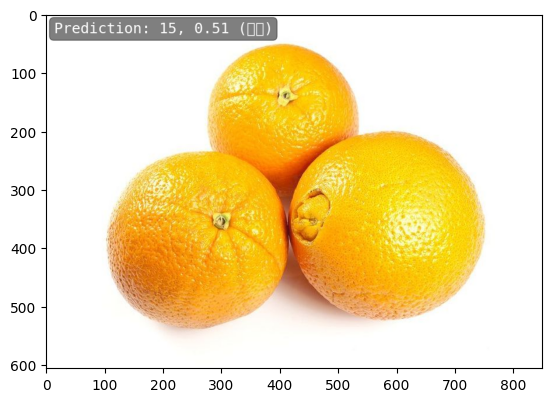

In [10]:
import matplotlib.pyplot as plt
import imageio
img = imageio.imread('/content/fruit/test_orange.png')
plt.imshow(img)
plt.show()